In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/mrbachkani/Projects/Project Credit Risk/statlog+german+credit+data/german.data')

In [3]:
df.head()

,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...


In [4]:
df = pd.read_csv("/home/mrbachkani/Projects/Project Credit Risk/statlog+german+credit+data/german.data", delimiter=" ", header=None)
df.columns = ["Status", "Duration", "Credit_History", "Purpose", "Credit_Amount",
              "Savings", "Employment", "Installment_Rate", "Personal_Status_Sex",
              "Other_Debtors", "Present_Residence", "Property", "Age",
              "Other_Installment_Plans", "Housing", "Existing_Credits",
              "Job", "Liable_People", "Telephone", "Foreign_Worker", "Target"]


In [5]:
df.head()

,Status,Duration,Credit_History,Purpose,Credit_Amount,Savings,Employment,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
df["Target"] = df["Target"].map({1: 0, 2: 1})  # 0 = Good, 1 = Bad
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Status', 'Credit_History', 'Purpose', 'Savings', 'Employment',
       'Personal_Status_Sex', 'Other_Debtors', 'Property',
       'Other_Installment_Plans', 'Housing', 'Job', 'Telephone',
       'Foreign_Worker'],
      dtype='object')


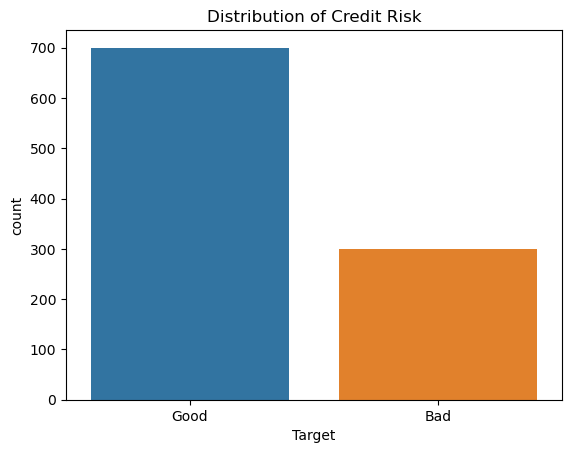

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Target')
plt.title("Distribution of Credit Risk")
plt.xticks([0, 1], ["Good", "Bad"])
plt.show()

In [8]:
df.describe()


,Duration,Credit_Amount,Installment_Rate,Present_Residence,Age,Existing_Credits,Liable_People,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


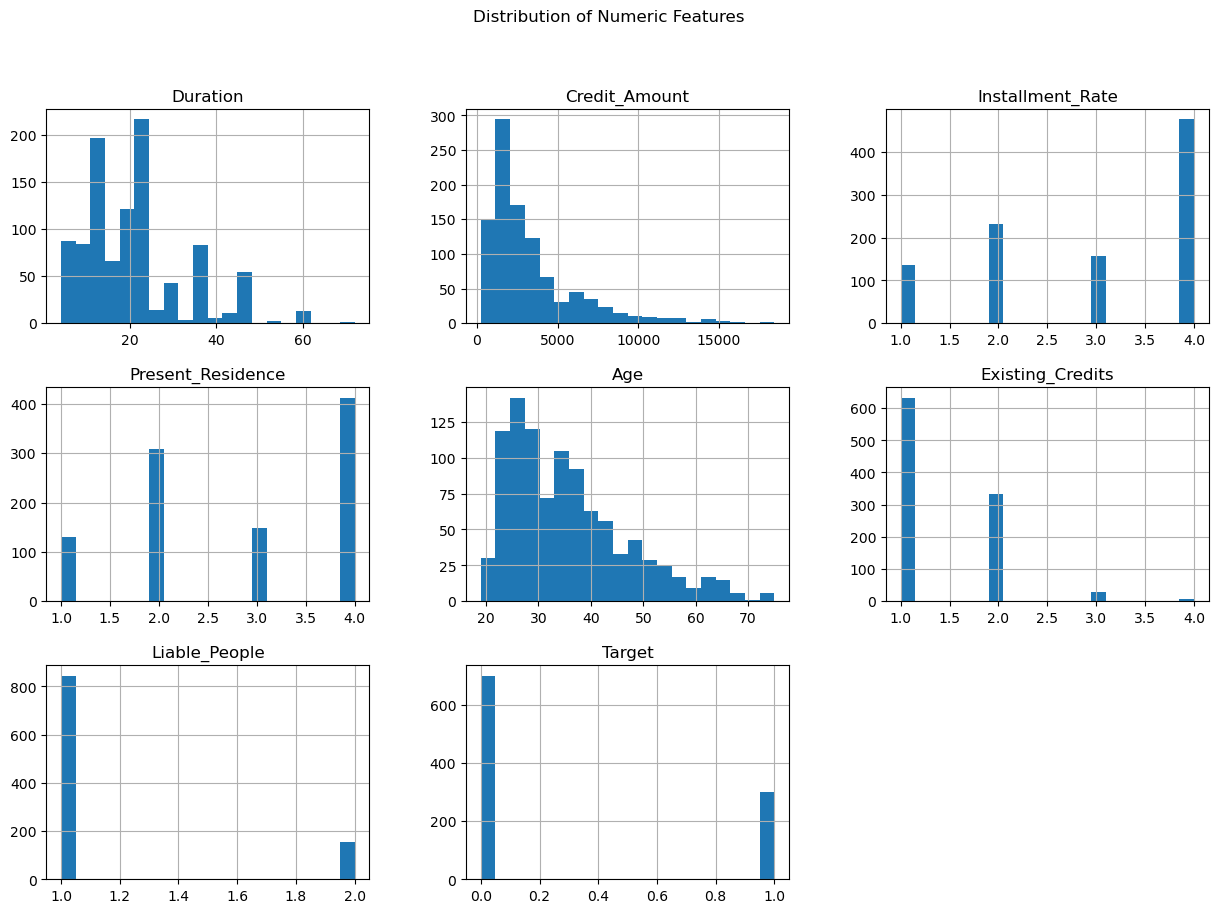

In [9]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numeric Features")
plt.show()


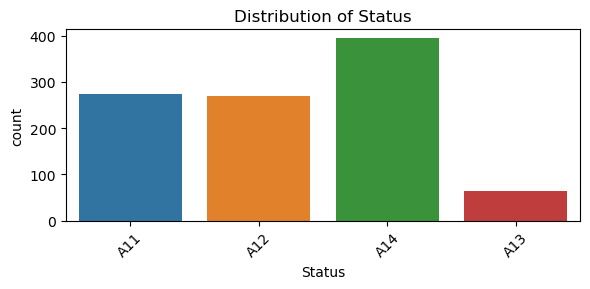

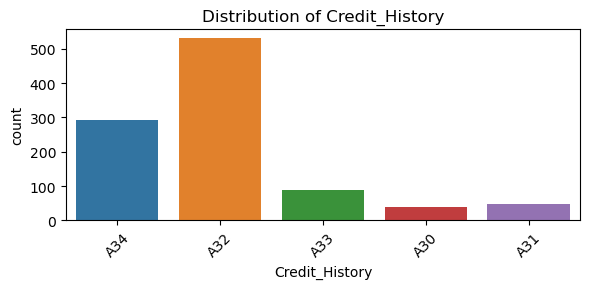

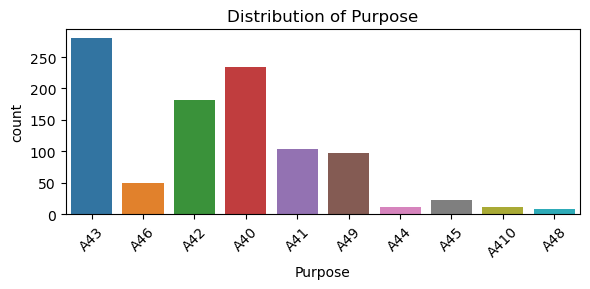

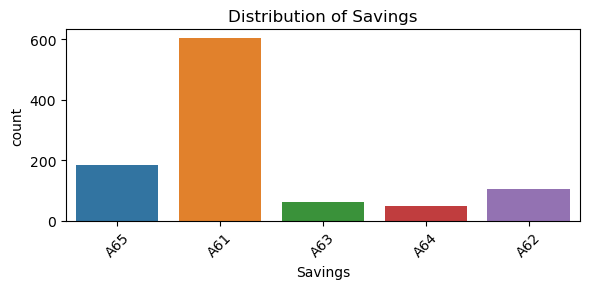

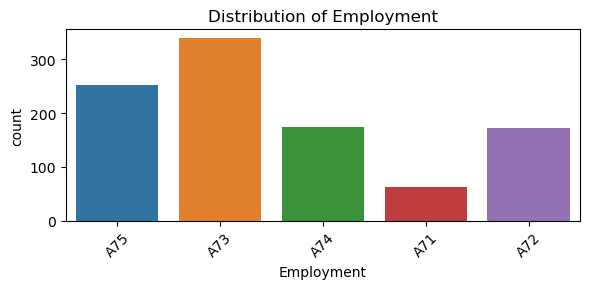

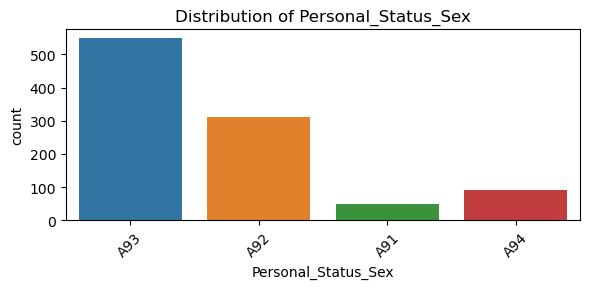

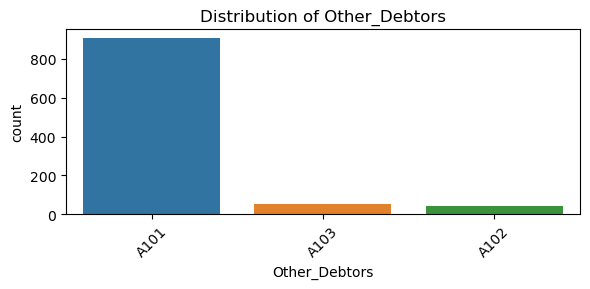

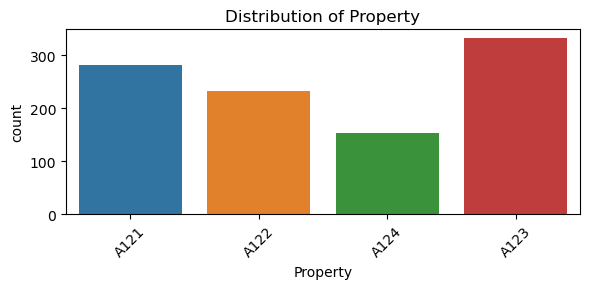

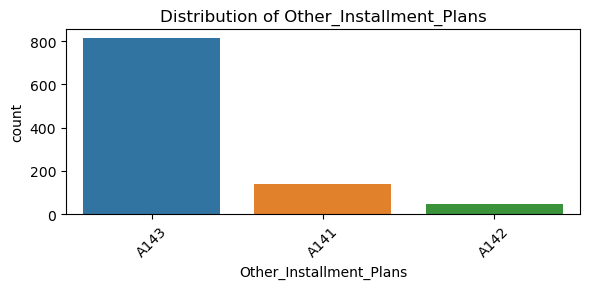

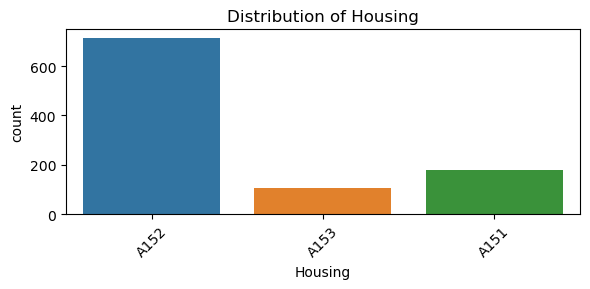

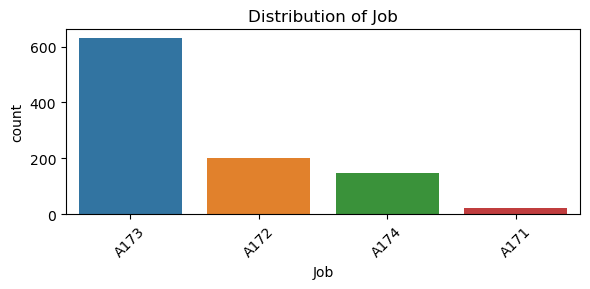

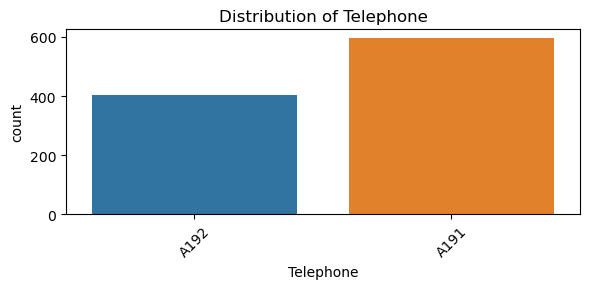

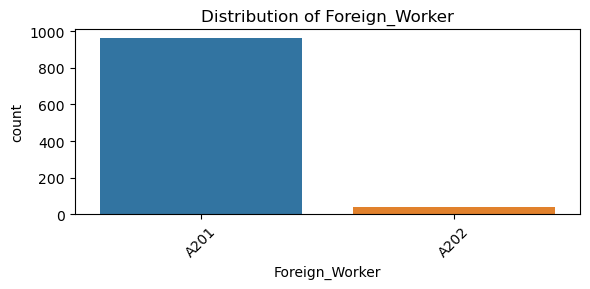

In [10]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
df['Target'] = df['Target'].map({0: 'Good', 1: 'Bad'})


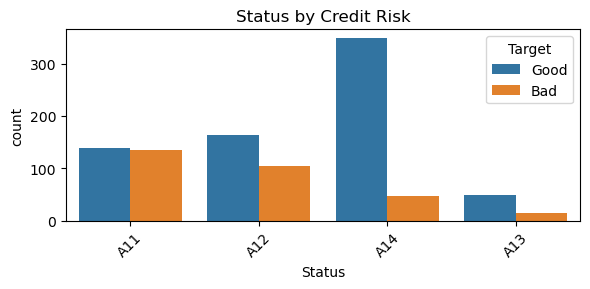

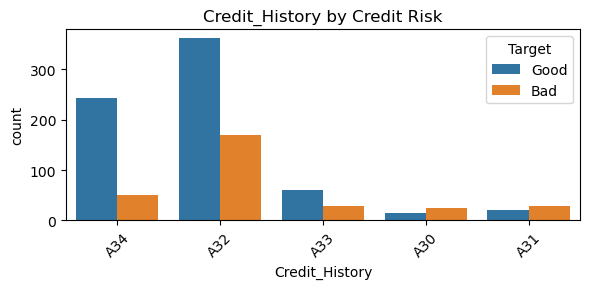

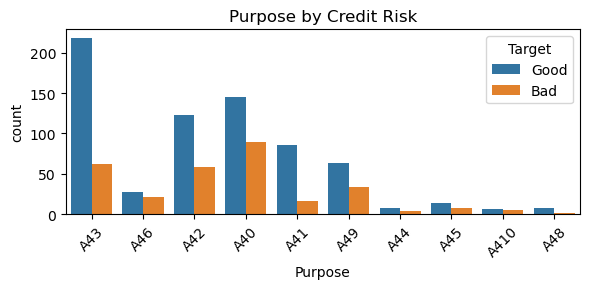

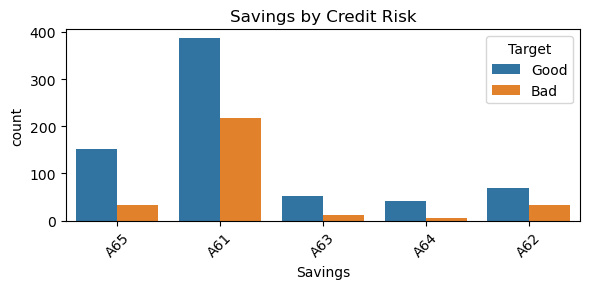

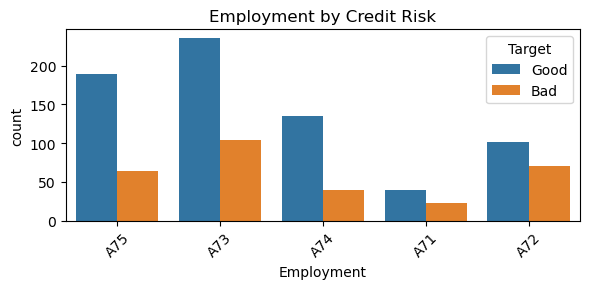

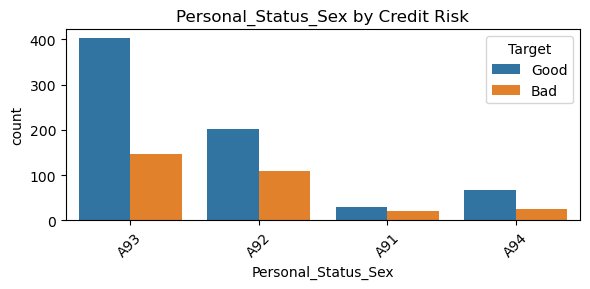

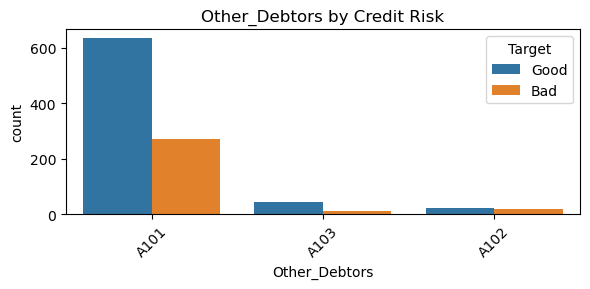

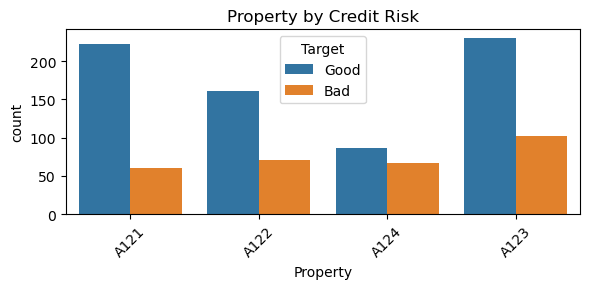

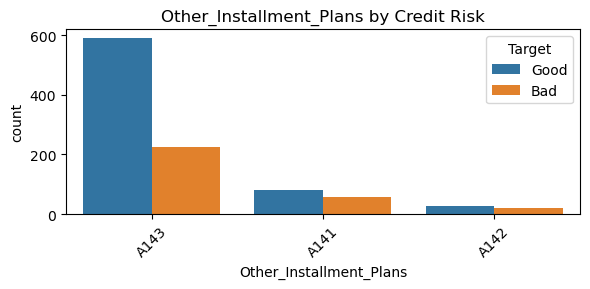

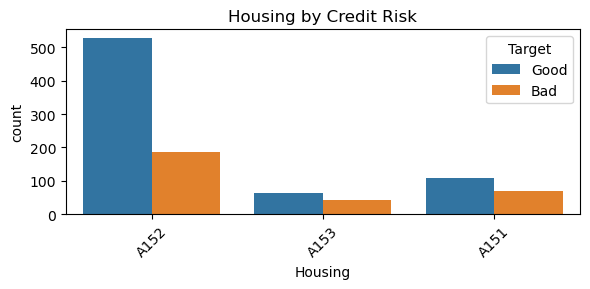

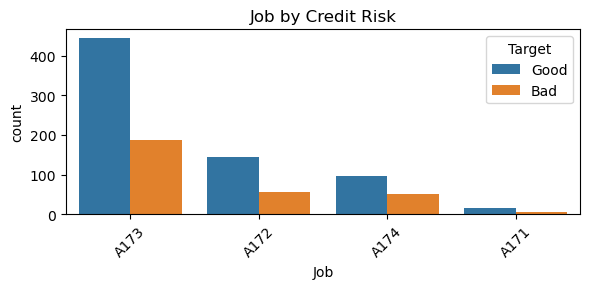

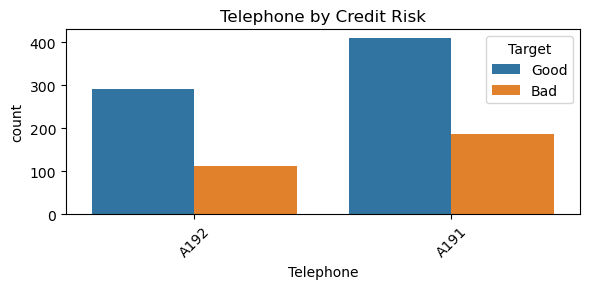

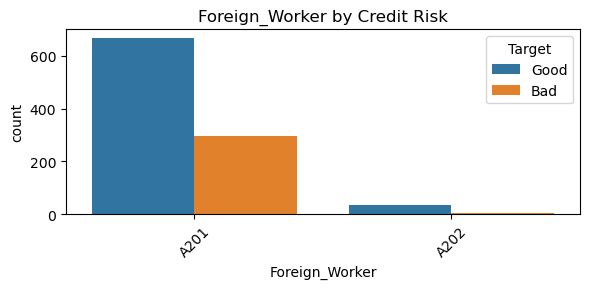

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='Target')
    plt.title(f"{col} by Credit Risk")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


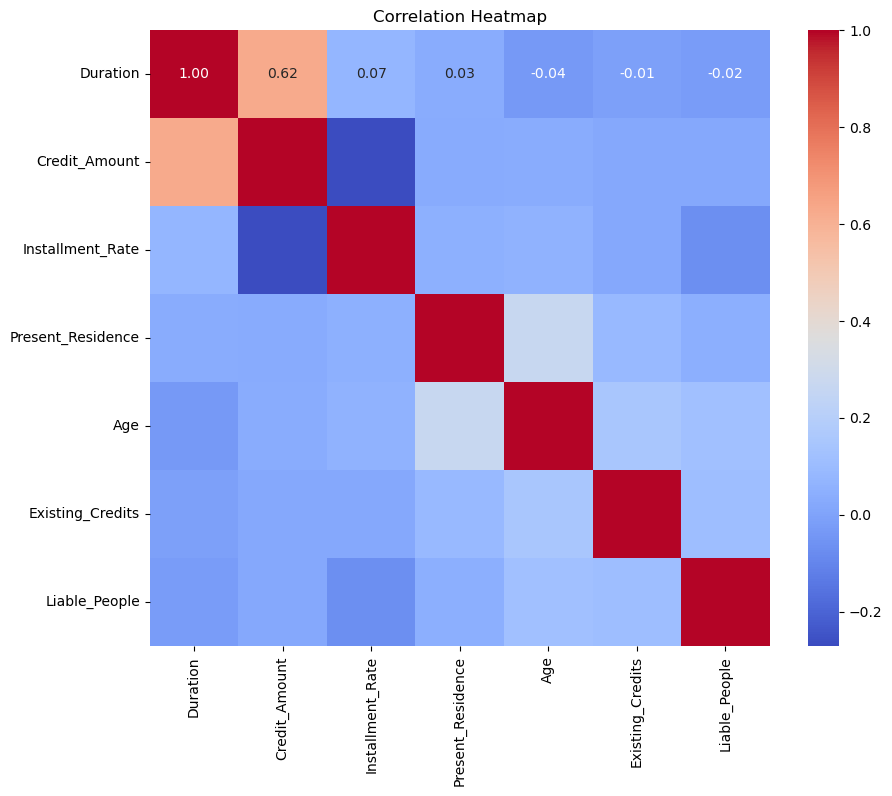

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [14]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Convert categorical to numerical
print(df.dtypes)


Duration                         int64
Credit_Amount                    int64
Installment_Rate                 int64
Present_Residence                int64
Age                              int64
Existing_Credits                 int64
Liable_People                    int64
Target                          object
Status_A12                        bool
Status_A13                        bool
Status_A14                        bool
Credit_History_A31                bool
Credit_History_A32                bool
Credit_History_A33                bool
Credit_History_A34                bool
Purpose_A41                       bool
Purpose_A410                      bool
Purpose_A42                       bool
Purpose_A43                       bool
Purpose_A44                       bool
Purpose_A45                       bool
Purpose_A46                       bool
Purpose_A48                       bool
Purpose_A49                       bool
Savings_A62                       bool
Savings_A63              

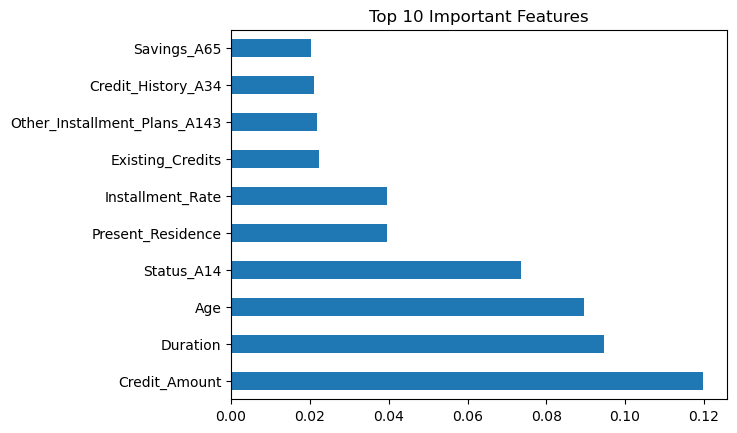

In [15]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("Target", axis=1)
y = df["Target"]

model = RandomForestClassifier().fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [19]:
# Convert target labels to 0 (Good) and 1 (Bad)
df['Target'] = df['Target'].map({'Good': 0, 'Bad': 1})


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data
X = df.drop(columns=['Target'])  # Replace 'Target' with your actual label column
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83       141
           1       0.62      0.34      0.44        59

    accuracy                           0.74       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.73      0.74      0.72       200

Accuracy: 0.745


In [21]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

# Setup Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


In [22]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       141
           1       0.63      0.29      0.40        59

    accuracy                           0.74       200
   macro avg       0.69      0.61      0.61       200
weighted avg       0.72      0.74      0.70       200



In [23]:
!pip install xgboost



In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
print("Best XGBoost Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/mrbachkani/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mrbachkani/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mrbachkani/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mrbachkani/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [05:42:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/mrbachkani/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning

Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [50]:
y_pred = best_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.805
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       141
           1       0.73      0.54      0.62        59

    accuracy                           0.81       200
   macro avg       0.78      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200



In [76]:
selected_features = ['Duration', 'Credit_Amount', 'Age']

X = df[selected_features]
y = df['Target']  # Make sure this is numeric (0/1)

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)

import joblib
joblib.dump(model, 'xgb_model.pkl')


['xgb_model.pkl']

In [52]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


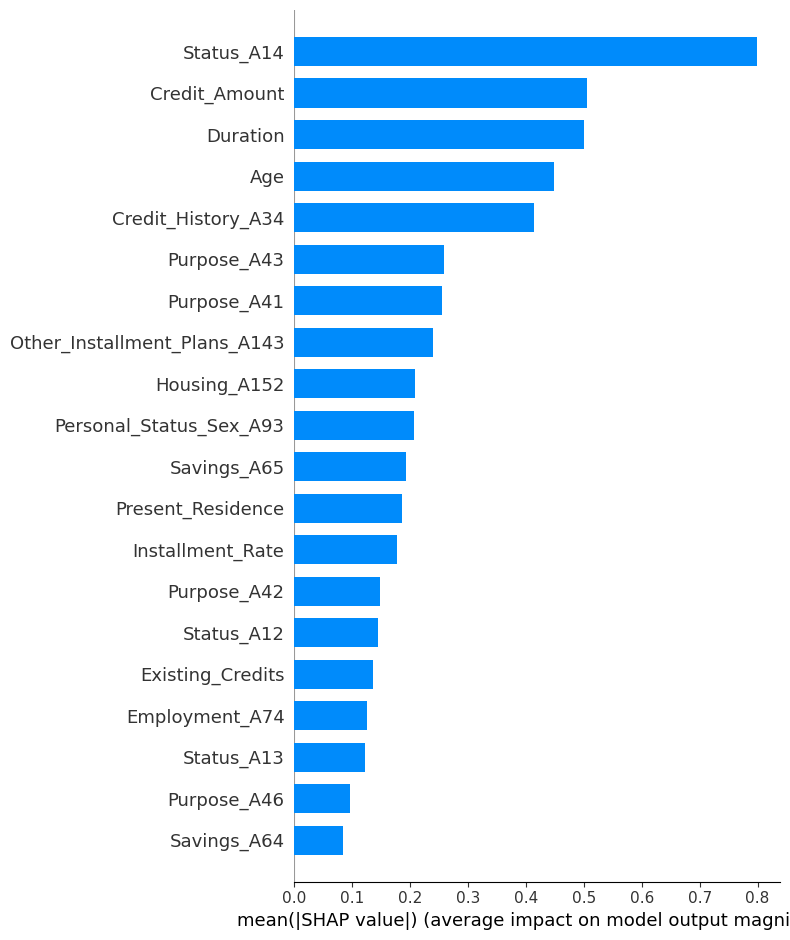

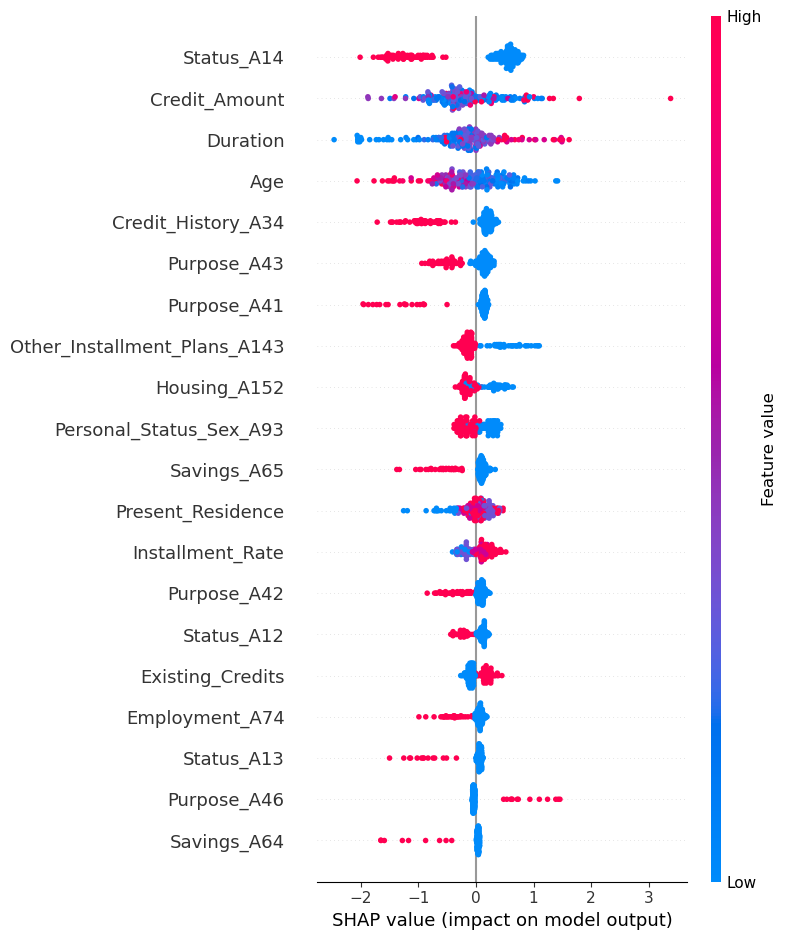

In [54]:
import shap

explainer = shap.TreeExplainer(grid_search.best_estimator_)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)  # beeswarm for individual impact


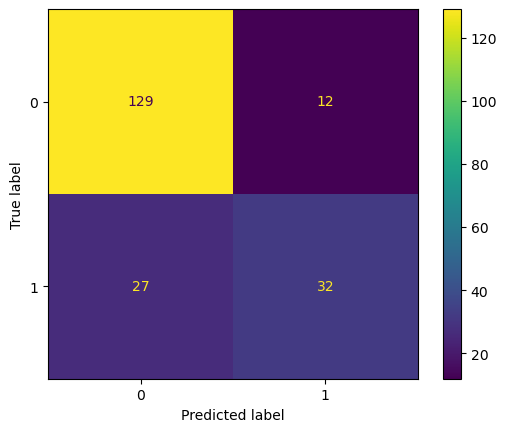

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


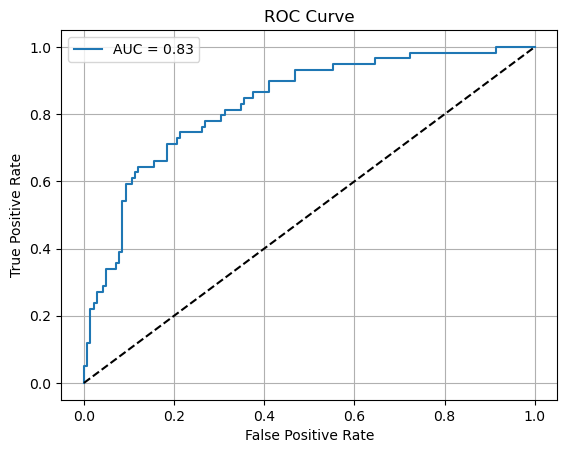

In [58]:
from sklearn.metrics import roc_auc_score, roc_curve

y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
